**Data Preparation**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
df = pd.read_csv('airbnb_sydney.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              25480 non-null  int64  
 1   name                            25480 non-null  object 
 2   host_id                         25480 non-null  int64  
 3   host_name                       25478 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   25480 non-null  object 
 6   latitude                        25480 non-null  float64
 7   longitude                       25480 non-null  float64
 8   room_type                       25480 non-null  object 
 9   price                           24382 non-null  float64
 10  minimum_nights                  25480 non-null  int64  
 11  number_of_reviews               25480 non-null  int64  
 12  last_review                     

In [ ]:
df.corr().price

<ipython-input-6-a35444e9070e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().price


id                                0.115583
host_id                          -0.033339
neighbourhood_group                    NaN
latitude                          0.179618
longitude                         0.173002
price                             1.000000
minimum_nights                   -0.083826
number_of_reviews                -0.056181
reviews_per_month                -0.037983
calculated_host_listings_count    0.108506
availability_365                  0.138373
number_of_reviews_ltm            -0.056340
Name: price, dtype: float64

In [ ]:
df.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             2
neighbourhood_group               25480
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                              1098
minimum_nights                        0
number_of_reviews                     0
last_review                        7205
reviews_per_month                  7205
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           10457
dtype: int64

In [ ]:
# Creating dataframe for implementing regression
df = df.drop(['id', 'host_name', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'last_review', 'reviews_per_month', 'license'], axis=1)

In [ ]:
# extracting features from name column
import re
def extract_values(text, pattern):
    match = pattern.search(text)

    return  match.group(1) if match else None

bedroom_pattern = re.compile("(\d+)\s*bedroom(s?)(\s+)")
bed_pattern = re.compile("(\d+)\s*bed(s?)(\s+)")
bath_pattern = re.compile("(\d+)(\.\d+)?\s*(shared | private)?\s*bath(s?)")
star_pattern = re.compile("★\d+(\.\d+)?")

df['num_bedrooms'] = df['name'].apply(func=lambda x: extract_values(x, bedroom_pattern)).astype('float')
df['num_bathrooms'] = df['name'].apply(func=lambda x: extract_values(x, bath_pattern)).astype('float')
df['num_beds'] = df['name'].apply(func=lambda x: extract_values(x, bed_pattern)).astype('float')
df['stars'] = df['name'].apply(func=lambda x: extract_values(x, star_pattern)).astype('float')

# after extracting features we remove name column
df = df.drop(['name'], axis=1)

In [ ]:
# creating binary columns from the column room_type
df['private_room'] = df['room_type'].apply(func=lambda row: 1 if row == 'Private room' else 0)
df['shared_room'] = df['room_type'].apply(func=lambda row: 1 if row == 'Shared room' else 0)
df['hotel_room'] = df['room_type'].apply(func=lambda row: 1 if row == 'Hotel room' else 0)
df['entire_room'] = df['room_type'].apply(func=lambda row: 1 if row == 'Entire home/apt' else 0)

# deleting room_type column
df = df.drop(['room_type'], axis=1)

In [ ]:
# removing rows where price is missing
df = df.dropna(subset=['price'], axis=0)

In [ ]:
# Changing missing values to mean value
df['num_bedrooms'] = df['num_bedrooms'].fillna(df['num_bedrooms'].mean())
df['num_bathrooms'] = df['num_bathrooms'].fillna(df['num_bathrooms'].mean())
df['num_beds'] = df['num_beds'].fillna(df['num_beds'].mean())
df['stars'] = df['stars'].fillna(df['stars'].mean())

<Axes: >

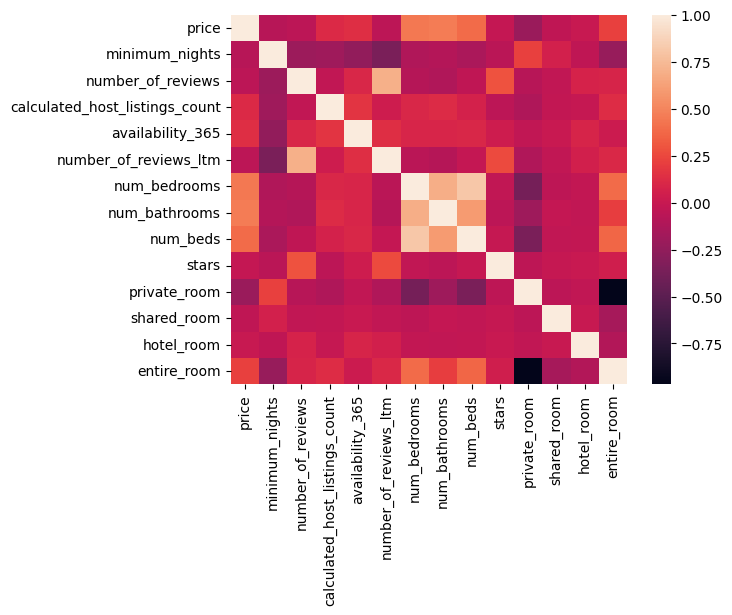

In [ ]:
corr = df.corr()
sns.heatmap(corr)

**Training a model**

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns_to_normalize = df.columns[df.columns != 'price']
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'price'],
                                                    df['price'])

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = model.score(X_test, y_test)
mse = mean_squared_error(y_test, predictions)
print(f"Score: {score}, MSE: {mse}")

Score: 0.31711213236370195, MSE: 171906.4680420706


In [ ]:
model = Ridge()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = model.score(X_test, y_test)
mse = mean_squared_error(y_test, predictions)
print(f"Score: {score}, MSE: {mse}")

Score: 0.31812965448023767, MSE: 171650.322572956


In [ ]:
model = Lasso()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = model.score(X_test, y_test)
mse = mean_squared_error(y_test, predictions)
print(f"Score: {score}, MSE: {mse}")

Score: 0.3206856616254048, MSE: 171006.88727202313


**KNN Regressor**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
model = KNeighborsRegressor(n_neighbors = 47)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = model.score(X_test, y_test)
# score = 1 - (np.sum((predictions - y_test) ** 2) / np.sum((y_test - y_test.mean())** 2))
score

0.4210483956147131

In [ ]:
scores = []
neighbors = np.arange(1, 50)
mse1 = []
for k in range(1, 50):
    model = KNeighborsRegressor(n_neighbors = k)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    mse = mean_squared_error(y_test, model.predict(X_test))
    scores.append(score)
    mse1.append(mse)

    print(f"n_neighbors: {k}, score: {score}, mse: {mse}")

n_neighbors: 1, score: -0.12465918639022755, mse: 283115.57086614176
n_neighbors: 2, score: 0.1384053153424304, mse: 216893.14767880578
n_neighbors: 3, score: 0.26911107942830237, mse: 183989.99136045497
n_neighbors: 4, score: 0.3188549228939297, mse: 171467.7474573491
n_neighbors: 5, score: 0.35059100191370907, mse: 163478.67998031495
n_neighbors: 6, score: 0.36654180259741076, mse: 159463.3123951954
n_neighbors: 7, score: 0.37581919406764497, mse: 157127.87245567518
n_neighbors: 8, score: 0.3858126792103368, mse: 154612.16699987696
n_neighbors: 9, score: 0.39833009425410026, mse: 151461.1011936587
n_neighbors: 10, score: 0.4054851850651251, mse: 149659.9176492782
n_neighbors: 11, score: 0.40036568932991035, mse: 150948.67158928225
n_neighbors: 12, score: 0.4014536312699355, mse: 150674.79901779856
n_neighbors: 13, score: 0.3967361883669107, mse: 151862.342370203
n_neighbors: 14, score: 0.3996641812757905, mse: 151125.26540153465
n_neighbors: 15, score: 0.40555909517552746, mse: 14964

In [ ]:
def vizualize_metrics(n_neighbors, scores, mse):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('R2 score')
    plt.plot(n_neighbors, scores, color='blue')
    plt.xlabel('n_neighbors')
    plt.ylabel('score')
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.title('MSE')
    plt.plot(n_neighbors, mse1, color='red')
    plt.xlabel('n_neighbors')
    plt.ylabel('mse')
    plt.grid()

    plt.tight_layout()
    plt.show()

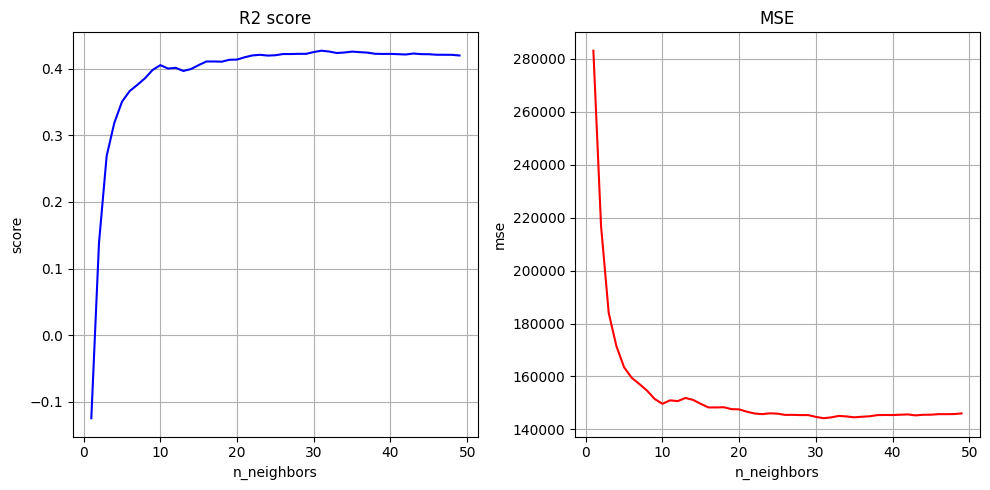

In [ ]:
vizualize_metrics(neighbors, scores, mse1)

In [ ]:
# best number of neighbors
np.argmax(scores), np.argmin(mse1)

(30, 30)

KNN Classifier

In [ ]:
# create a list of conditions
conditions = [
    (df['price'] < 100),
    (df['price'] >= 100) & (df['price'] < 250),
     (df['price'] >= 250) & (df['price'] < 600),
    (df['price'] >= 600) ]

# create a list of the values we want to assign for each condition
categories = ['economic', 'low-mid', 'high-mid','high']

# create a new column and use np.select to assign values to it using our lists as arguments
df['price_range'] = np.select(conditions, categories)

In [ ]:
labelencoder = LabelEncoder()
df['price_range_cat'] = labelencoder.fit_transform(df['price_range'])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# new df without price_range and price columns for knn classifier
df1 = df[['minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'num_bedrooms', 'num_bathrooms', 'num_beds',
       'stars', 'private_room', 'shared_room', 'hotel_room', 'entire_room','price_range_cat']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df1.loc[:, df1.columns != 'price_range_cat'],
                                                    df1['price_range_cat'])

In [ ]:
mse1 = []
scores = []
neighbors = np.arange(1, 50)
for k in range(1, 50):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    score = model.score(X_test, y_test)
    scores.append(score)
    mse1.append(mse)
    print(f"n_neighbors: {k}, score: {score}, mse: {mse}")

n_neighbors: 1, score: 0.5565944881889764, mse: 1.4978674540682415
n_neighbors: 2, score: 0.5393700787401575, mse: 1.5226377952755905
n_neighbors: 3, score: 0.5664370078740157, mse: 1.5995734908136483
n_neighbors: 4, score: 0.5951443569553806, mse: 1.3787729658792651
n_neighbors: 5, score: 0.6036745406824147, mse: 1.3051181102362204
n_neighbors: 6, score: 0.6107283464566929, mse: 1.312992125984252
n_neighbors: 7, score: 0.6138451443569554, mse: 1.2878937007874016
n_neighbors: 8, score: 0.6164698162729659, mse: 1.3016732283464567
n_neighbors: 9, score: 0.6156496062992126, mse: 1.293471128608924
n_neighbors: 10, score: 0.6233595800524935, mse: 1.2831364829396326
n_neighbors: 11, score: 0.6179461942257218, mse: 1.2844488188976377
n_neighbors: 12, score: 0.6228674540682415, mse: 1.2828083989501313
n_neighbors: 13, score: 0.6231955380577427, mse: 1.2773950131233596
n_neighbors: 14, score: 0.6258202099737533, mse: 1.272965879265092
n_neighbors: 15, score: 0.625492125984252, mse: 1.2936351706

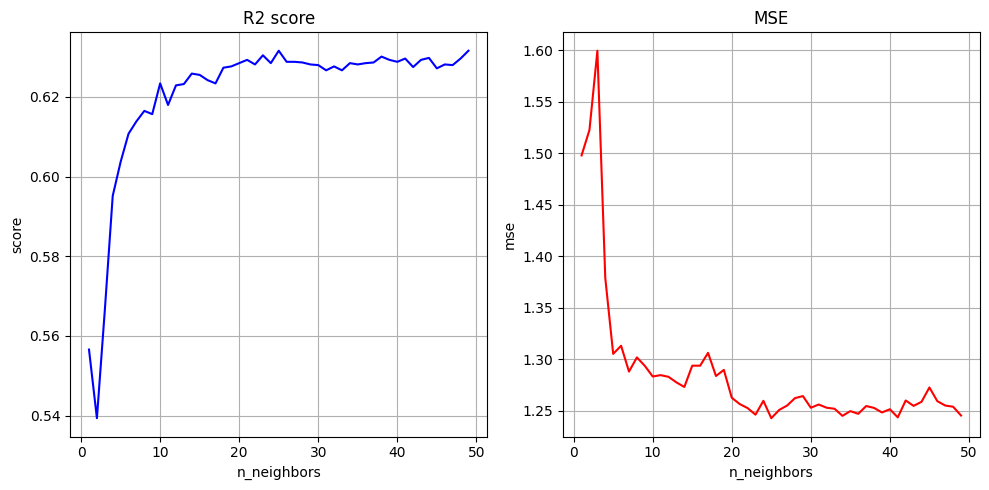

In [ ]:
vizualize_metrics(neighbors, scores, mse1)

In [ ]:
# best number of neighbors
np.argmax(scores), np.argmin(mse1)

(24, 24)

In [ ]:
preds = pd.DataFrame({'actual': y_test.values, 'predicted': predictions})
preds

,actual,predicted
0,2,2
1,2,2
2,3,3
3,0,3
4,2,2
...,...,...
6091,3,3
6092,0,3
6093,1,1
6094,1,1


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [ ]:
tree = DecisionTreeClassifier(criterion='entropy', min_samples_split=2)
tree.fit(X_train, y_train)
predictions = tree.predict(X_test)
accuracy = tree.score(X_test, y_test)
mse = mean_squared_error(y_test, predictions)

print(f"Accuracy: {accuracy}, MSE: {mse}")

Accuracy: 0.589238845144357, MSE: 1.365977690288714


In [ ]:
for i in range(2, 100):
    tree = DecisionTreeClassifier(criterion='gini', min_samples_split=60, max_depth=i)
    tree.fit(X_train, y_train)
    predictions = tree.predict(X_test)
    accuracy = tree.score(X_test, y_test)
    mse = mean_squared_error(y_test, predictions)

    print(f"min_samples_split: {i}, Accuracy: {accuracy}, MSE: {mse}")

min_samples_split: 2, Accuracy: 0.5651246719160105, MSE: 1.4726049868766404
min_samples_split: 3, Accuracy: 0.5984251968503937, MSE: 1.3218503937007875
min_samples_split: 4, Accuracy: 0.631233595800525, MSE: 1.25
min_samples_split: 5, Accuracy: 0.6325459317585301, MSE: 1.2463910761154855
min_samples_split: 6, Accuracy: 0.6423884514435696, MSE: 1.2253937007874016
min_samples_split: 7, Accuracy: 0.6430446194225722, MSE: 1.2263779527559056
min_samples_split: 8, Accuracy: 0.6456692913385826, MSE: 1.2370406824146982
min_samples_split: 9, Accuracy: 0.6468175853018373, MSE: 1.224737532808399
min_samples_split: 10, Accuracy: 0.645505249343832, MSE: 1.2436023622047243
min_samples_split: 11, Accuracy: 0.6461614173228346, MSE: 1.2350721784776904
min_samples_split: 12, Accuracy: 0.6469816272965879, MSE: 1.2188320209973753
min_samples_split: 13, Accuracy: 0.6428805774278216, MSE: 1.230479002624672
min_samples_split: 14, Accuracy: 0.6410761154855643, MSE: 1.225229658792651
min_samples_split: 15, Acc

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
model = RandomForestClassifier()
random_forest = RandomForestClassifier(criterion='gini', min_samples_split=30)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)
accuracy = random_forest.score(X_test, y_test)
mse = mean_squared_error(y_test, predictions)

print(f"Accuracy: {accuracy}, MSE: {mse}")

Accuracy: 0.666994750656168, MSE: 1.1277887139107612


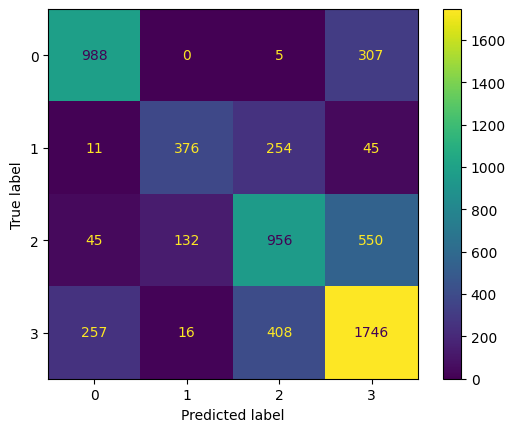

In [ ]:
cm = confusion_matrix(y_test, predictions)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()